In [3]:
import pandas as pd
import itertools as it
import numpy as np
import networkx as nx
from networkx.algorithms import community as nxcom
import matplotlib.pyplot as plt
import statistics as stat
import powerlaw as pw

In [11]:
model1_pixar = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/model1_pixar.csv')
model1_dreamworks = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/model1_dreamworks.csv')
model1_disney = pd.read_csv('C:/Users/Lenovo/Documents/GitHub/NetSci/dataset/model1_disney.csv')

In [12]:
print("Pixar:", model1_pixar[0:2])
print("DreamWorks:", model1_dreamworks[0:2])
print("Disney:", model1_disney[0:2])

Pixar:    Unnamed: 0         source          target      film  year studio
0           0  John Lasseter     Pete Docter  ToyStory  1995  Pixar
1           1  John Lasseter  Andrew Stanton  ToyStory  1995  Pixar
DreamWorks:    Unnamed: 0        source       target  film  year      studio
0           0  Eric Darnell  Tim Johnson  Antz  1998  DreamWorks
1           1  Eric Darnell  Todd Alcott  Antz  1998  DreamWorks
Disney:    Unnamed: 0            source           target       film  year  studio
0           0  William Cottrell       David Hand  SnowWhite  1937  Disney
1           1  William Cottrell  Wilfred Jackson  SnowWhite  1937  Disney


In [15]:
#Concatenate the data sets into one
model1 = pd.concat([model1_pixar, model1_dreamworks, model1_disney])

In [16]:
print("Model1:", len(model1), model1[0:9])

Model1:    Unnamed: 0         source            target      film  year studio
0           0  John Lasseter       Pete Docter  ToyStory  1995  Pixar
1           1  John Lasseter    Andrew Stanton  ToyStory  1995  Pixar
2           2  John Lasseter         Joe Ranft  ToyStory  1995  Pixar
3           3  John Lasseter       Joss Whedon  ToyStory  1995  Pixar
4           4  John Lasseter        Joel Cohen  ToyStory  1995  Pixar
5           5  John Lasseter      Alec Sokolow  ToyStory  1995  Pixar
6           6  John Lasseter     Bonnie Arnold  ToyStory  1995  Pixar
7           7  John Lasseter        Ed Catmull  ToyStory  1995  Pixar
8           8  John Lasseter  Ralph Guggenheim  ToyStory  1995  Pixar


#### Drawing the Network

In [17]:
G = nx.from_pandas_edgelist(model1, source = 'source', target = 'target', create_using=nx.Graph())

In [18]:
print("Nodes: {}. Edges: {}".format(len(G.nodes), len(G.edges)))

Nodes: 774. Edges: 12579


C:\Users\Lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


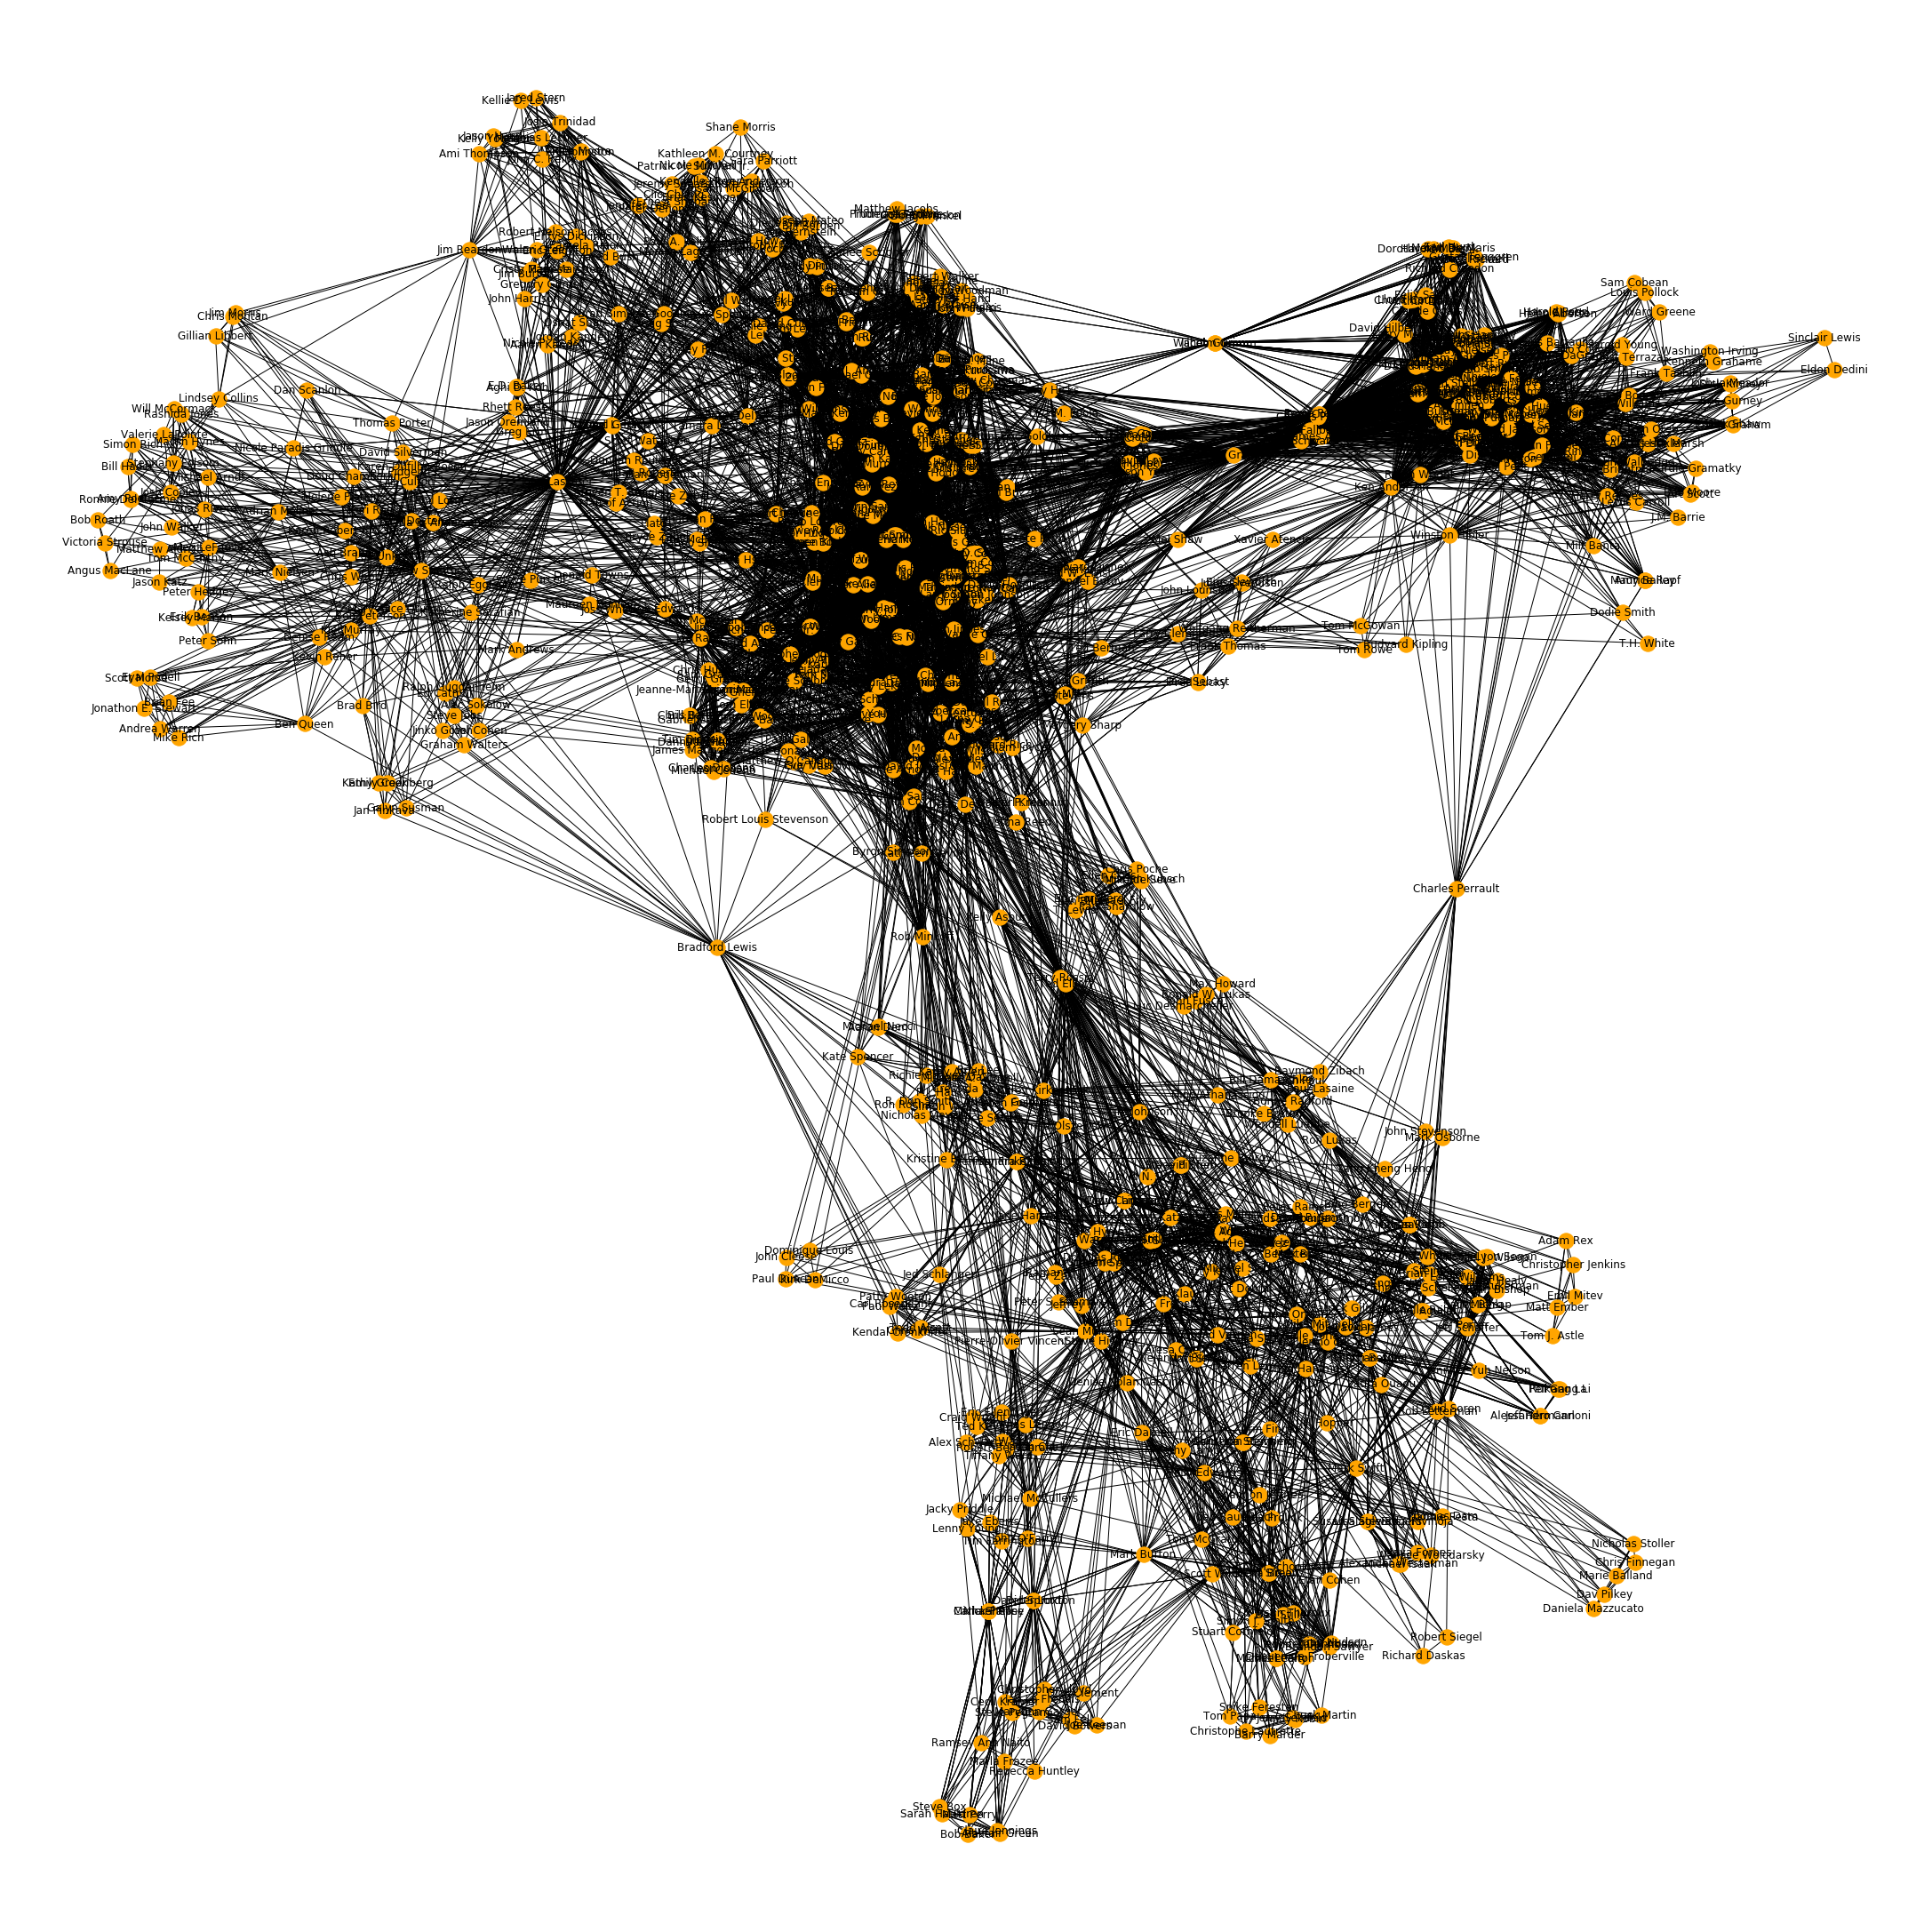

In [19]:
#Graph 1
plt.figure(figsize = (30, 30))
nx.draw_spring(G, with_labels=True, node_color='orange')

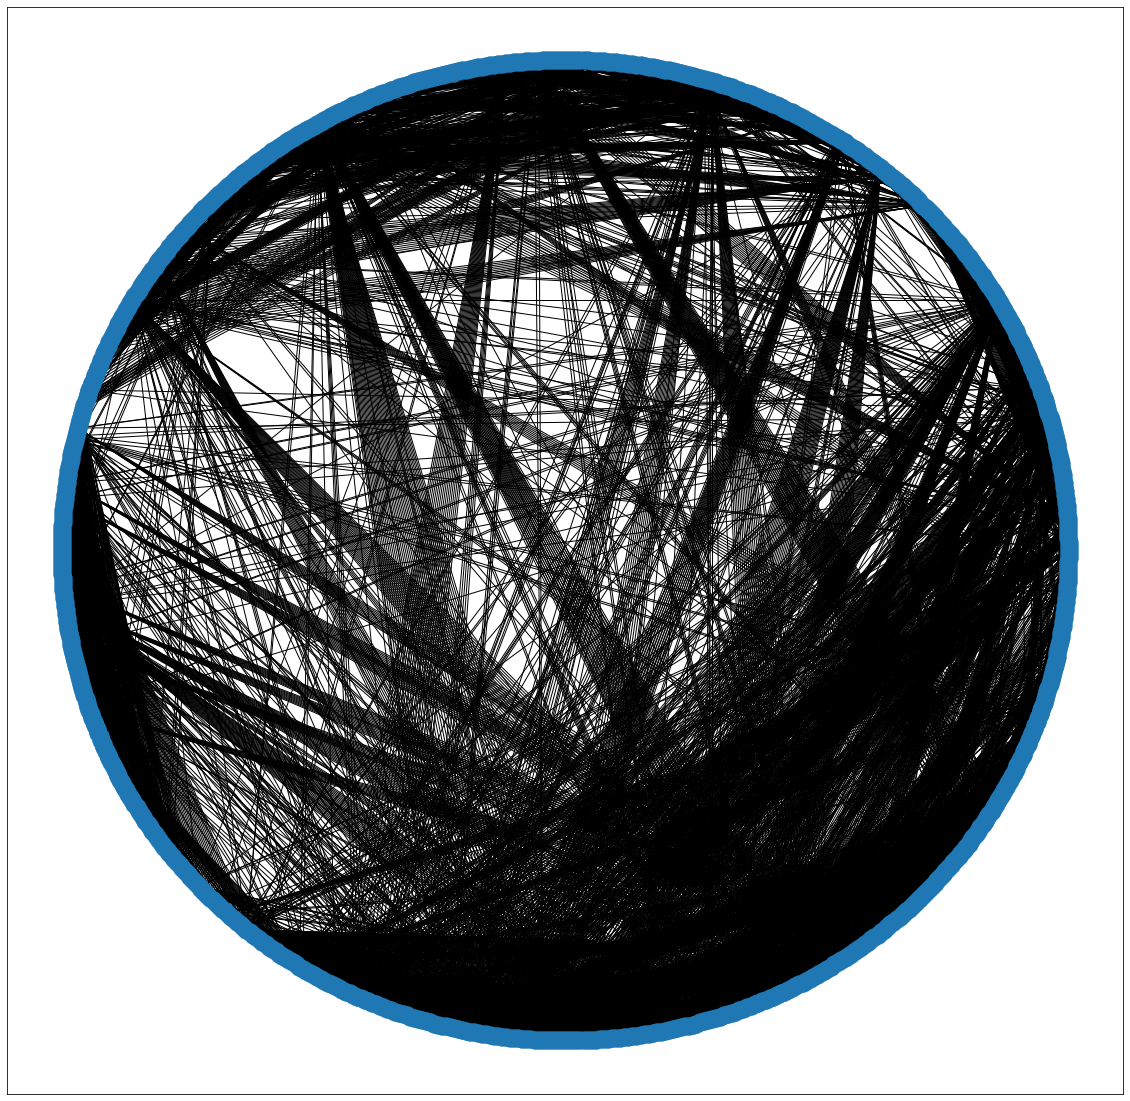

In [20]:
#Graph 2
plt.figure(figsize = (20, 20))
nx.draw_networkx(G, pos = nx.circular_layout(G), with_labels=False)

The links almost resembles a random network. We expect that in this network where almost all the nodes have collaborated with each other, the network is almost random.

#### Degree distribution: Is this network scale-free?

In [21]:
#Take the degrees
degrees = [G.degree(node) for node in G]
degrees.sort(reverse=True)
kmin = min(degrees)
kmax = max(degrees)
print("Degree sequence", degrees)
print("Degree min", kmin)
print("Degree max", kmax)
print("Degree mean", stat.mean(degrees))
print("Degree sd", stat.stdev(degrees))

Degree sequence [188, 175, 170, 131, 126, 120, 119, 118, 117, 117, 117, 115, 109, 107, 106, 106, 106, 105, 103, 102, 100, 100, 99, 99, 97, 96, 94, 94, 94, 93, 92, 92, 90, 90, 90, 90, 89, 89, 89, 89, 88, 87, 87, 86, 85, 85, 85, 84, 84, 84, 82, 82, 82, 81, 81, 81, 81, 81, 80, 80, 80, 78, 78, 78, 78, 77, 77, 77, 77, 76, 76, 76, 75, 75, 74, 74, 74, 74, 74, 73, 73, 73, 71, 71, 70, 70, 70, 70, 70, 69, 67, 67, 67, 67, 67, 66, 65, 65, 65, 65, 63, 63, 63, 63, 62, 62, 61, 61, 61, 61, 61, 61, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 59, 59, 58, 58, 58, 58, 57, 56, 56, 56, 55, 55, 54, 54, 54, 54, 54, 53, 53, 53, 53, 53, 52, 52, 51, 51, 50, 50, 50, 50, 49, 49, 49, 49, 49, 48, 47, 47, 47, 47, 46, 46, 46, 46, 46, 46, 45, 45, 44, 44, 44, 44, 44, 44, 44, 43, 43, 43, 42, 42, 42, 42, 42, 42, 42, 41, 41, 40, 40, 40, 39, 39, 38, 38, 38, 38, 38, 38, 38, 37, 37, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 36, 35, 34, 34, 34, 34, 34, 34, 3

In [22]:
#We shall use the powerlaw package developed by Alstott, et al.
fit = pw.Fit(degrees)

Calculating best minimal value for power law fit
C:\Users\Lenovo\Anaconda3\lib\site-packages\powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Text(0.5, 1.0, 'Degree distribution (dotted) and Theoretical PDF (line)')

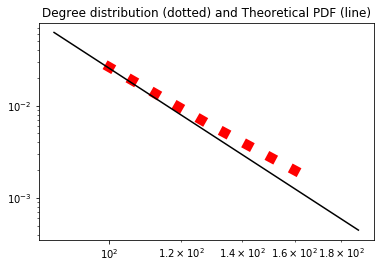

In [23]:
#Plot of the strength distribution in Log-log scale and the theoretical pdf
fig1 = fit.plot_pdf(color='r', linewidth = 10, linestyle= ":")
fit.power_law.plot_pdf(color='black', linestyle="-", ax=fig1)
plt.title('Degree distribution (dotted) and Theoretical PDF (line)')

In [24]:
#MLE Estimate of alpha, [Clauset, et al. 2009]
print("MLE for alpha:", fit.power_law.alpha)

MLE for alpha: 6.402007407652605


#### Size of the network

In [27]:
#Diameter: longest path
print("Diameter:", nx.diameter(G))

#Average path
print("Average shortest path", nx.average_shortest_path_length(G))

Diameter: 5
Average shortest path 2.839662912709635


In [28]:
def path_length_histogram(G, title=None):
    # Find path lengths
    length_source_target = dict(nx.shortest_path_length(G))
    # Convert dict of dicts to flat list
    all_shortest = sum([list(length_target.values())
        for length_target in length_source_target.values()], [])
    # Calculate integer bins
    high = max(all_shortest)
    bins = [-0.5 + i for i in range(high + 2)]
    # Plot histogram
    plt.figure(figsize=(8, 6))
    plt.hist(all_shortest, bins=bins, rwidth=0.8)
    plt.title(title)
    plt.xlabel("Distance")
    plt.ylabel("Count")
    plt.tight_layout()

([<matplotlib.axis.XTick at 0x224cfe61688>,
 <a list of 3 Text xticklabel objects>)

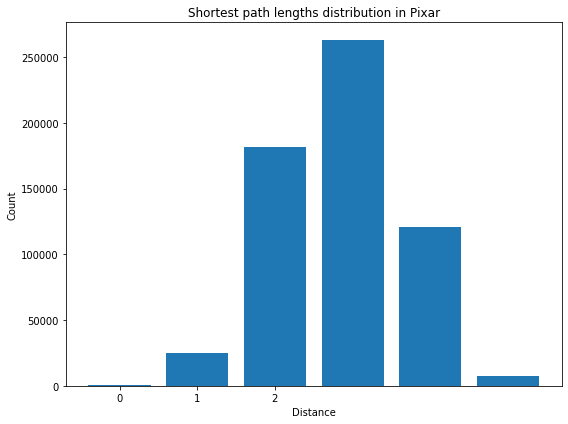

In [29]:
path_length_histogram(G, title="Shortest path lengths distribution in Pixar")
plt.xticks([0, 1, 2])

#### Measures of Centrality

In [30]:
#Global clustering
print("Transitivity:", nx.transitivity(G))
print("Average clustering:", nx.average_clustering(G))

Transitivity: 0.5499815993162068
Average clustering: 0.8073404399747829


#### The Central Airports: The hubs, the most in-between, and the closest

In [31]:
#Eigenvector Centrality
eigenvector = nx.eigenvector_centrality(G)
print("The top 10 hubs:")
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

The top 10 hubs:


[('Joe Grant', 0.14461675298205473),
 ('Walt Disney', 0.1375158659075334),
 ('Wilfred Jackson', 0.1315114600568447),
 ('Perce Pearce', 0.13074583587649613),
 ('Tom Codrick', 0.13074583587649613),
 ('Ken Anderson', 0.13029998072285046),
 ('Dick Kelsey', 0.12954416032642194),
 ('James Algar', 0.12847769524669952),
 ('Hugh Hennesy', 0.12803211552963759),
 ("Kendall O'Connor", 0.12803211552963759)]

In [32]:
#Local Clustering Coefficient of the top-10 Hubs
clustering = nx.clustering(G)
print("The local clustering coeff of the top 10 hubs:")
[(x, clustering[x]) for x in sorted(G, key=lambda x:eigenvector[x], reverse=True)[0:10]]

The local clustering coeff of the top 10 hubs:


[('Joe Grant', 0.27908109989557955),
 ('Walt Disney', 0.43751842027704096),
 ('Wilfred Jackson', 0.5025641025641026),
 ('Perce Pearce', 0.49433962264150944),
 ('Tom Codrick', 0.49433962264150944),
 ('Ken Anderson', 0.40539345711759506),
 ('Dick Kelsey', 0.5820175438596491),
 ('James Algar', 0.512521840419336),
 ('Hugh Hennesy', 0.6431960049937578),
 ("Kendall O'Connor", 0.6431960049937578)]

In [33]:
#Betweenness Centrality
betweenness = nx.betweenness_centrality(G, normalized=False)
print("The top 10 hubs and their betweenness")
sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[0:10]

The top 10 hubs and their betweenness


[('John Lasseter', 40994.215376033935),
 ('Joe Grant', 31726.750669725618),
 ('Chris Sanders', 16692.978917688397),
 ('Burny Mattinson', 16161.397904111125),
 ('Brenda Chapman', 14369.428458777269),
 ('Bonnie Arnold', 11799.843502686546),
 ('Charles Perrault', 10943.507758842794),
 ('Jeffrey Katzenberg', 10433.649840263783),
 ('Terry Rossio', 10110.393242578853),
 ('Ted Elliott', 10110.393242578853)]

In [34]:
#Closeness Centrality
closeness = nx.closeness_centrality(G)
print("The top 10 hubs and their closeness")
#[(x, closeness[x]) for x in sorted(G1, key=lambda x:eigenvector[x], reverse=True)[0:10]]
sorted(closeness.items(), key=lambda x: x[1], reverse=True)[0:10]

The top 10 hubs and their closeness


[('Burny Mattinson', 0.5085526315789474),
 ('Chris Sanders', 0.5082182774490467),
 ('Brenda Chapman', 0.49048223350253806),
 ('John Lasseter', 0.48042262274704783),
 ('Don Hahn', 0.47105423522242534),
 ('Francis Glebas', 0.4707673568818514),
 ('Don Dougherty', 0.4687689508793208),
 ('Irene Mecchi', 0.46594333936106086),
 ('Joe Grant', 0.4651022864019254),
 ('Chris Williams', 0.46482260974143114)]

#### Community structure

In [35]:
#Greedy algo
# Find the communities
print("Community Detection: Clauset-Newman-Moore Greedy Algorithm")
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

# Count the communities
print("Number of communities:", len(communities))
for i in range(len(communities)):
    print("")
    print("Community {}: {}".format(i+1, list(communities[i])))

Community Detection: Clauset-Newman-Moore Greedy Algorithm
Number of communities: 5

Community 1: ['John Norton', 'Gregory Gunter', 'Aurian Redson', 'Baker Bloodworth', 'Phil Lorin', 'Thomas Cardone', 'Scott Watanabe', 'Jonas Rivera', 'Josann McGibbon', 'Scott Morse', 'Don Hahn', 'Martin Hynes', 'Tab Murphy', 'Igor Khait', 'Ron Clements', 'Valerie LaPointe', 'Ralph Guggenheim', 'David Hoselton', 'Larry Scholl', 'Miguel Tejada-Flores', 'Alison Yerxa', 'Burny Mattinson', 'Matthew Jacobs', 'Bob Roath', 'Robert D. San Souci', 'Chuck Williams', 'Bruce Woodside', 'Shane Morris', 'E.D. Baker', 'Nathan Greno', 'Kelsey Mann', 'Mark Nielsen', 'Steve Purcell', 'Mary Alice Drumm', 'Ash Brannon', 'Will McCormack', 'Robert S. Garber', 'Bill Perkins', 'Ian Gooding', 'Kaan Kalyon', 'Mark Kennedy', 'Rob Gibbs', 'Ron Anderson', 'Prudence Fenton', 'Rick Maki', 'John Ramirez', 'Davy Liu', 'Chris Webb', 'Tamara Lusher', 'Pam Marsden', 'Emily Cook', 'J.T. Allen', 'Jill Culton', 'Thomas Porter', 'Simon Rich'

In [36]:
#Visualization
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0
            
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [37]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

# Set community color for nodes
node_color = [
    get_color(G.nodes[v]['community'])
    for v in G.nodes]

# Set community color for internal edges
external = [
    (v, w) for v, w in G.edges
    if G.edges[v, w]['community'] == 0]
internal = [
    (v, w) for v, w in G.edges
    if G.edges[v, w]['community'] > 0]
internal_color = [
    get_color(G.edges[e]['community'])
    for e in internal]

C:\Users\Lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \
C:\Users\Lenovo\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:595: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  for c in edge_color]):


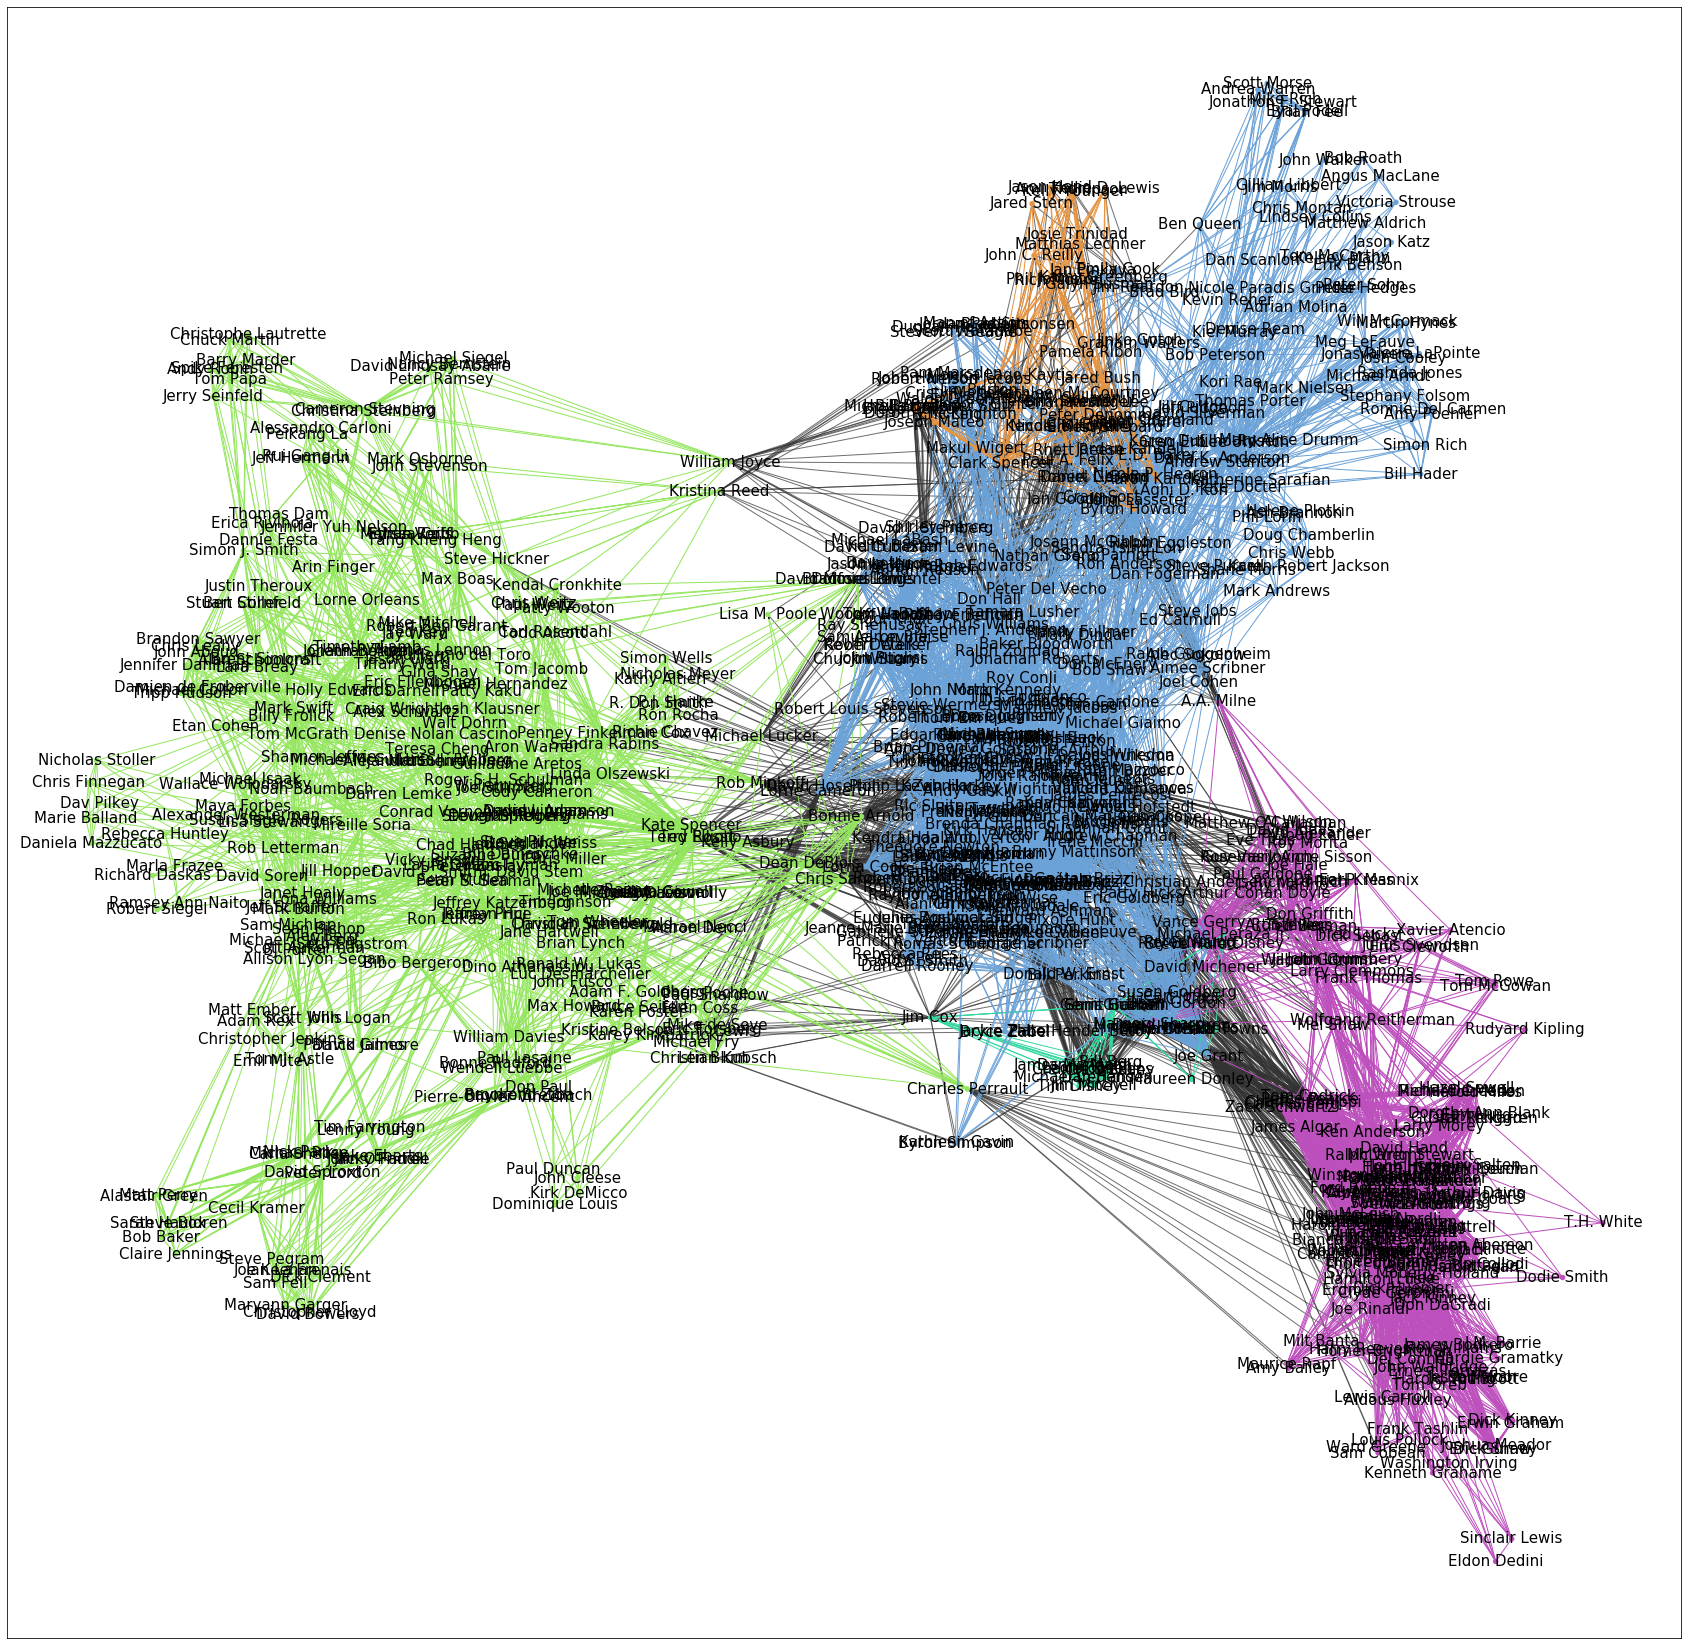

In [38]:
plt.figure(figsize=(30, 30))
pos = nx.spring_layout(G)
# Draw external edges
nx.draw_networkx(
    G, pos=pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False, alpha = 0.7, font_size = 15)
# Draw nodes and internal edges
nx.draw_networkx(
    G, pos=pos, node_color=node_color,
    edgelist=internal, edge_color=internal_color, node_size=20, 
    with_labels=True, font_size = 15)
#plt.title("Communities of Directors, Writers, Screenplay and Producers in Pixar")